In [1]:
import numpy as np
import tensorflow as tf 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as k
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import time

In [19]:
df1 = pd.read_csv("C:/Projects\Stress Level Detector/Train Data/frequency_domain_features_train.csv")
df2 = pd.read_csv("C:/Projects\Stress Level Detector/Train Data/heart_rate_non_linear_features_train.csv")
df3 = pd.read_csv("C:/Projects\Stress Level Detector/Train Data/time_domain_features_train.csv")

# Merge DataFrames on a common key (e.g., 'ID')
combined_train = pd.merge(df1, df2, on='uuid', how='outer')
combined_train = pd.merge(combined_train, df3, on='uuid', how='outer')

print(combined_train.head())

                                   uuid          VLF    VLF_PCT           LF  \
0  00000adc-655e-417e-80e1-e9ff737a67fe   321.283852  49.781991   277.083067   
1  000024de-dcbe-4797-82fb-b84b7fc7a244  1777.422472  64.160976   973.095386   
2  00004949-63e6-41a0-891c-3be64e4a20c5   794.879688  35.621931  1380.790628   
3  00006f1c-ba04-4894-9b03-0a4c5e8f66d7  3145.430710  69.006249  1407.742212   
4  00016a23-2579-498d-8b4e-8eacd8fdc02f  5408.833162  78.016869  1232.699708   

      LF_PCT      LF_NU          HF    HF_PCT      HF_NU           TP  ...  \
0  42.933209  85.493651   47.014762  7.284800  14.506349   645.381681  ...   
1  35.126567  98.012063   19.736876  0.712457   1.987937  2770.254734  ...   
2  61.879086  96.118269   55.763155  2.498984   3.881731  2231.433471  ...   
3  30.883850  99.645407    5.009522  0.109902   0.354593  4558.182444  ...   
4  17.780429  80.882148  291.369250  4.202702  19.117852  6932.902120  ...   

       KURT      SKEW  MEAN_REL_RR  MEDIAN_REL_RR 

In [21]:
# File paths for test data
test_file1 = r"C:\Projects\Stress Level Detector\Test Data\frequency_domain_features_test.csv"
test_file2 = r"C:\Projects\Stress Level Detector\Test Data\heart_rate_non_linear_features_test.csv"
test_file3 = r"C:\Projects\Stress Level Detector\Test Data\time_domain_features_test.csv"

# Load the test data
test_df1 = pd.read_csv(test_file1)
test_df2 = pd.read_csv(test_file2)
test_df3 = pd.read_csv(test_file3)

# Merge DataFrames on a common key (e.g., 'ID')
combined_test = pd.merge(test_df1, test_df2, on='uuid', how='outer')
combined_test = pd.merge(combined_test, test_df3, on='uuid', how='outer')

# Display the combined test data
print(combined_test.head())


                                   uuid          VLF    VLF_PCT           LF  \
0  0002c510-b64c-47fc-82a4-6a5eb6dde1f7  8301.221164  88.579962   996.666154   
1  00035f6f-c710-40c4-b5dd-1723bbcc8d24  1651.695406  48.381261  1742.137072   
2  0003f5e9-5f6e-415a-b7a4-4ad496601d06  1132.089595  71.808918   428.957254   
3  00045f92-dd9d-478e-9081-48a6f1467196  1522.885252  43.761832  1935.301130   
4  00053021-3d2a-4e9b-95f4-9f48b8d2f863  4353.496105  86.515564   678.325273   

      LF_PCT      LF_NU         HF    HF_PCT     HF_NU           TP  ...  \
0  10.635140  93.127009  73.556289  0.784898  6.872991  9371.443606  ...   
1  51.030467  98.860351  20.083131  0.588273  1.139649  3413.915609  ...   
2  27.208939  96.516120  15.483791  0.982143  3.483880  1576.530640  ...   
3  55.613069  98.888479  21.753070  0.625099  1.111521  3479.939451  ...   
4  13.480130  99.968070   0.216656  0.004306  0.031930  5032.038034  ...   

       KURT      SKEW  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_REL_RR

In [32]:
combined_train_count = len(combined_train.columns)
combined_train_count

37

In [33]:
combined_train.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,00000adc-655e-417e-80e1-e9ff737a67fe,321.283852,49.781991,277.083067,42.933209,85.493651,47.014762,7.284800,14.506349,645.381681,...,0.587088,-0.488301,0.000068,0.000348,0.013256,0.009104,0.009104,1.456159,0.587088,-0.488301
1,000024de-dcbe-4797-82fb-b84b7fc7a244,1777.422472,64.160976,973.095386,35.126567,98.012063,19.736876,0.712457,1.987937,2770.254734,...,0.489019,0.179729,-0.000020,-0.002606,0.017073,0.008040,0.008040,2.123522,0.489019,0.179729
2,00004949-63e6-41a0-891c-3be64e4a20c5,794.879688,35.621931,1380.790628,61.879086,96.118269,55.763155,2.498984,3.881731,2231.433471,...,-0.189207,-0.239950,-0.000052,-0.001508,0.023820,0.013738,0.013737,1.733940,-0.189207,-0.239950
3,00006f1c-ba04-4894-9b03-0a4c5e8f66d7,3145.430710,69.006249,1407.742212,30.883850,99.645407,5.009522,0.109902,0.354593,4558.182444,...,-0.382627,0.007728,0.000217,0.000941,0.019254,0.008041,0.008041,2.394505,-0.382627,0.007728
4,00016a23-2579-498d-8b4e-8eacd8fdc02f,5408.833162,78.016869,1232.699708,17.780429,80.882148,291.369250,4.202702,19.117852,6932.902120,...,1.763236,1.343089,0.000294,0.000255,0.034629,0.023720,0.023720,1.459873,1.763236,1.343089


In [49]:
label = ['condition']
features = ['MEAN_RR','RMSSD','pNN25','pNN50','LF','HF','LF_HF']

In [50]:
scaler = StandardScaler()
scaler.fit(combined_train[features])
combined_train[features] = scaler.transform(combined_train[features])


In [51]:
x = combined_train[features].values
y = combined_train[label].values

In [52]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=40)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(258502, 7) (258502, 1) (110787, 7) (110787, 1)


In [54]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming y_train and y_test are the original label arrays (with string labels like 'no stress')
label_encoder = LabelEncoder()

# Fit and transform the train labels
y_train = label_encoder.fit_transform(y_train)

# Transform the test labels
y_test = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("One-hot encoded y_train:", y_train[:10])  # Print first 10 encoded labels for verification

One-hot encoded y_train: [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


c:\Projects\venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Projects\venv\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


creating model

In [55]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [56]:
model = Sequential()
model.add(Dense(50, activation='relu',kernel_initializer='he_normal', input_shape=(x_train.shape[1],)))
model.add(Dense(20, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(3,activation='softmax'))

c:\Projects\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=1024,verbose = 1)

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6188 - loss: 0.9054 - val_accuracy: 0.6858 - val_loss: 0.7163
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7144 - loss: 0.6783 - val_accuracy: 0.7807 - val_loss: 0.5707
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7850 - loss: 0.5498 - val_accuracy: 0.8127 - val_loss: 0.4761
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8194 - loss: 0.4623 - val_accuracy: 0.8453 - val_loss: 0.4101
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8497 - loss: 0.4007 - val_accuracy: 0.8665 - val_loss: 0.3684
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8656 - loss: 0.3640 - val_accuracy: 0.8770 - val_loss: 0.3379
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8763 - loss: 0.3365 - val_accuracy: 0.8868 - val_loss: 0.3119
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8852 - loss: 0.3121 - val_accuracy: 0.

<Axes: >

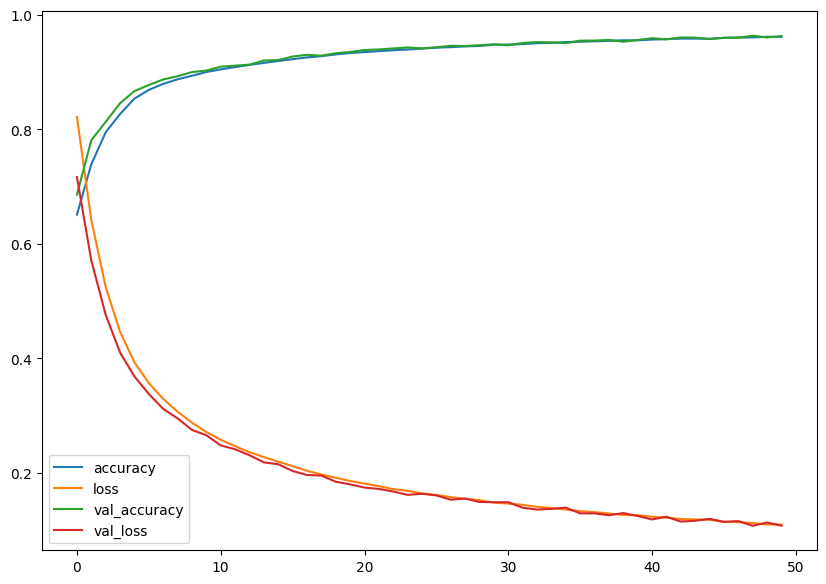

In [59]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [60]:
combined_test[features] = scaler.transform(combined_test[features])
combined_test[features].head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF
0,0.593478,0.753306,0.401704,1.818509,0.087319,0.755762,-0.283847
1,0.877341,1.748126,2.223828,1.010582,1.385662,-0.422092,-0.081005
2,-0.648994,-1.373181,-1.021831,-0.874583,-0.901427,-0.523402,-0.244624
3,-0.242220,0.530555,0.507452,-0.268637,1.722084,-0.385308,-0.074851
4,2.378888,0.469496,0.564394,-0.874583,-0.467117,-0.859691,8.354909


In [61]:
x = combined_test[features].values
y = combined_test[label].values

In [64]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming y contains string labels like 'no stress', 'stress', etc.
label_encoder = LabelEncoder()

# Fit the label encoder and transform the labels into integers
y = label_encoder.fit_transform(y)

# Now convert the integer labels to one-hot encoding
y = to_categorical(y)

print("One-hot encoded labels:", y[:10])  # Print first 10 encoded labels for verification


One-hot encoded labels: [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


c:\Projects\venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
loss, acc = model.evaluate(x,y, verbose=1)

1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9606 - loss: 0.1115


In [66]:
t = scaler.transform(combined_test[features].iloc[5545].values.reshape(1,-1))
print(t)

[[-6.79148717 -3.74264797 -1.25102906 -1.75783292 -1.64957798 -0.87743821
  -0.32192017]]


c:\Projects\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
y_pred = model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


In [68]:
print(np.argmax(y_pred[0]))
print(combined_test[label].iloc[5545])

2
condition    time pressure
Name: 5545, dtype: object


In [69]:
import joblib

joblib.dump(scaler,'scaler.joblib',compress=9)
model.save('tfmodel.h5')